### Capstone 1: White Wine Quality, UC Irvine
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)

# 6b. Random Forest Regressor
## White Wine, Outliers Removed

#### Audrey Hughes Rager
#### December 30, 2020


In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

sns.set_style('whitegrid')

## Data Wrangling

### Import Data

In [2]:
#Import csv files into Pandas data frames
df = pd.read_csv('winequality-white.csv',sep=";")
df = df.rename({'fixed acidity': 'fixed_acidity','volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar':'residual_sugar',  'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, axis=1)



### EDA


In [3]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


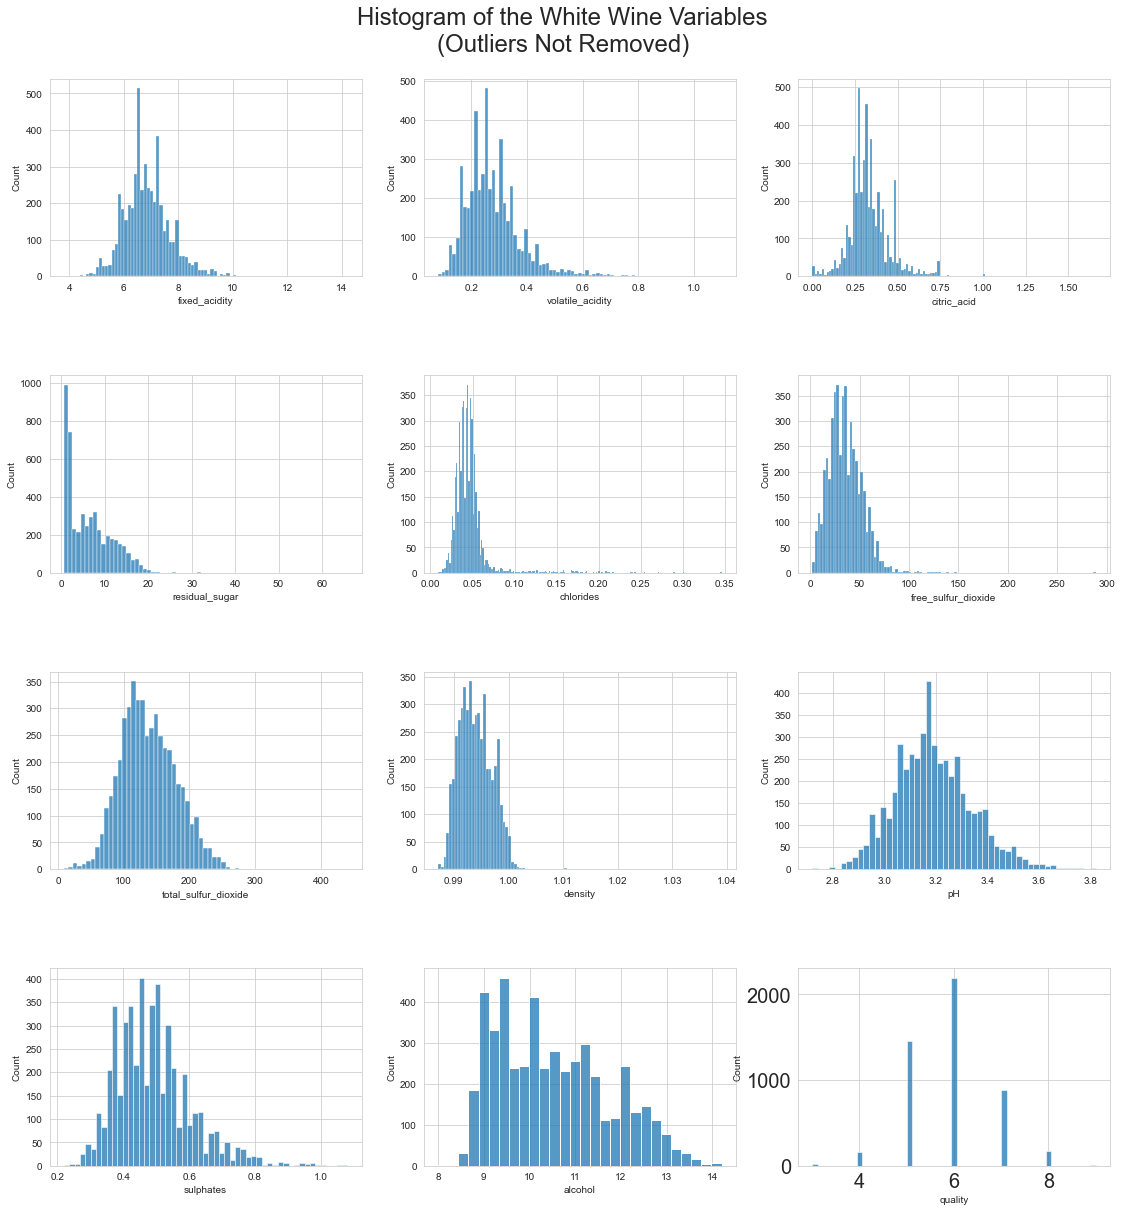

In [4]:
#Historgrams  - outliers removed (df)
def subplot_histplot(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.histplot(df.iloc[:, i], ax=ax)
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['quality','fixed_acidity','volatile_acidity', 'citric_acid', 'residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density', 'pH', 'sulphates','alcohol']
    


myhistplot = subplot_histplot(df[plot_columns], row = 4, column = 3, title = "Histogram of the White Wine Variables\n(Outliers Not Removed)")


### Train-Test-Split

In [5]:
#Independent variables (X) = everything but the target variable, y
#Target variable, y, is quality

#Set X to all the input variables (everything except 'quality')
X = df.drop('quality',axis=1)

#Set the variable to be predicted (y) to 'quality'
y = df['quality']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


### Scale Independent Variables

In [7]:
# applying Standard Scaling to the dataset to scale all the field values to same scale (approx.).

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

# Instantiate the Random Forest Regressor Model

In [8]:
rfr = RandomForestRegressor(n_estimators = 200, max_depth=20, min_samples_leaf=50, random_state = 42)

# Fit the Model to the Training Data

In [9]:
rfrModel = rfr.fit(X_train,y_train)

# Predict Using Test Data

In [10]:
y_pred = rfrModel.predict(X_test)

In [11]:
print(y_pred)

[6.19840252 6.88582393 6.59052887 5.68569269 6.61570806 6.55339985
 5.192348   5.26388705 6.04924713 5.27895486 6.42887367 5.03117078
 6.48432467 5.62461441 6.72369621 5.29089979 6.69572548 5.67434455
 6.28859772 5.54518142 5.41759714 5.7916306  5.28682328 6.04615113
 5.90382528 5.44299377 5.24652874 6.45605972 5.88320414 5.51259271
 5.33591233 5.41788735 5.64151015 5.42352732 5.63252778 6.56489321
 6.2733895  5.29112839 5.36236859 5.79411562 5.36153517 5.45290158
 5.97987805 5.45591408 4.92039438 5.94394146 5.36268053 5.28214162
 5.43827482 5.337726   4.96477477 6.4487644  5.65179899 6.02422334
 6.10630838 5.83857715 5.85106762 5.76386756 5.86863126 5.88788073
 5.9348915  6.23049851 5.08002952 6.4528277  6.02095208 6.1679244
 6.03066186 5.64356102 5.88833751 5.87893318 5.25513485 5.78900484
 5.11951354 4.9958694  5.8330232  6.35399353 5.92353998 5.92763223
 6.90683726 6.16548121 5.29868    5.65394422 6.1575471  6.27455931
 6.29863298 6.66176816 5.33781528 5.74284291 6.17064375 6.01615

In [12]:
print(rfr.predict([[0,0,0,0,0,0,0,0,0,0,0]]))

[5.76840553]


In [13]:
print(rfrModel.predict([[0,0,0,0,0,0,0,0,0,0,0]]))

[5.76840553]


# Evaluate Model

In [14]:
mae_r = mean_absolute_error(y_test,y_pred)
mse_r = mean_squared_error(y_test,y_pred)

In [15]:
print("Mean Absolute Error (MAE):",round(mae_r,4))
print("Mean Squared Error (MSE):",round(mse_r,4))


Mean Absolute Error (MAE): 0.5578
Mean Squared Error (MSE): 0.5054


In [16]:
importance = rfrModel.feature_importances_
importance

array([0.02073762, 0.19201898, 0.01724558, 0.03457244, 0.02298357,
       0.12559618, 0.01686484, 0.01840175, 0.03046917, 0.02326262,
       0.49784724])

In [17]:
columns = X.columns

In [18]:
rfrGraph = pd.Series(importance,columns)
rfrGraph

fixed_acidity           0.020738
volatile_acidity        0.192019
citric_acid             0.017246
residual_sugar          0.034572
chlorides               0.022984
free_sulfur_dioxide     0.125596
total_sulfur_dioxide    0.016865
density                 0.018402
pH                      0.030469
sulphates               0.023263
alcohol                 0.497847
dtype: float64

[Text(0.5, 1.0, 'White Wine Quality - Random Forest Regressor Model Visualization (Outliers Not Removed)')]

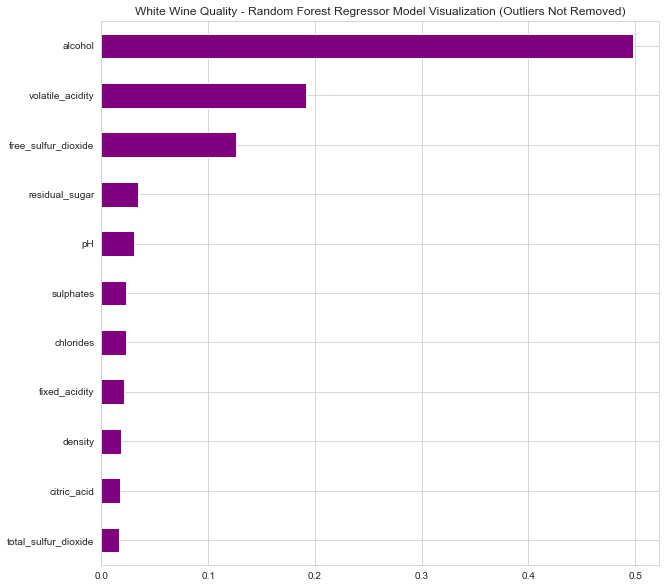

In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,10))

rfrGraph.sort_values().plot.barh(color="purple")

[plt.title("White Wine Quality - Random Forest Regressor Model Visualization (Outliers Not Removed)")]